In [107]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [108]:
for dirname, _, filenames in os.walk(os.path.join('..','extraction','data','raw')):
    for filename in filenames:
        print(os.path.join(dirname, filename))

..\extraction\data\raw\day4\attacking_data.csv
..\extraction\data\raw\day4\attempts_data.csv
..\extraction\data\raw\day4\defending_data.csv
..\extraction\data\raw\day4\disciplinary_data.csv
..\extraction\data\raw\day4\distribution_data.csv
..\extraction\data\raw\day4\goalkeeping_data.csv
..\extraction\data\raw\day4\goals_data.csv
..\extraction\data\raw\day4\key_stats_data.csv
..\extraction\data\raw\day4\players_data.csv
..\extraction\data\raw\day5\attacking_data.csv
..\extraction\data\raw\day5\attempts_data.csv
..\extraction\data\raw\day5\defending_data.csv
..\extraction\data\raw\day5\disciplinary_data.csv
..\extraction\data\raw\day5\distribution_data.csv
..\extraction\data\raw\day5\goalkeeping_data.csv
..\extraction\data\raw\day5\goals_data.csv
..\extraction\data\raw\day5\key_stats_data.csv
..\extraction\data\raw\day5\players_data.csv


In [109]:
path = os.path.join('..','extraction','data','raw','day5')

players_df = pd.read_csv(os.path.join(path, 'players_data.csv'))
disciplinary_df = pd.read_csv(os.path.join(path, 'disciplinary_data.csv'))
attempts_df = pd.read_csv(os.path.join(path, 'attempts_data.csv'))
distribution_df = pd.read_csv(os.path.join(path, 'distribution_data.csv'))
key_stats_df = pd.read_csv(os.path.join(path, 'key_stats_data.csv'))
attacking_df = pd.read_csv(os.path.join(path, 'attacking_data.csv'))
goals_df = pd.read_csv(os.path.join(path, 'goals_data.csv'))
goalkeeping_df = pd.read_csv(os.path.join(path, 'goalkeeping_data.csv'))
defending_df = pd.read_csv(os.path.join(path, 'defending_data.csv'))

## Feature Selection

In [110]:
# Selecting features 
goals = goals_df[['id_player','goals']].copy()
key_stats = key_stats_df[['id_player','top_speed(km/h)','matches_appareance','minutes_played','distance_covered(km)']].copy()
attacking = attacking_df[['id_player','assists','dribbles']].copy()
attempts = attempts_df[['id_player','attempts_on_target','total_attempts']].copy()
distribution = distribution_df[['id_player','passing_accuracy(%)','crossing_accuracy(%)']]
deffending = defending_df[['id_player','tackles_won', 'balls_recovered']]

# Merging all dataframes with offensive features
merged_df = pd.merge(goals, key_stats, on='id_player', how='inner')
merged_df = pd.merge(merged_df, attacking, on='id_player', how='inner')
merged_df = pd.merge(merged_df, attempts, on='id_player', how='inner')
merged_df = pd.merge(merged_df, distribution, on='id_player', how='inner')
merged_df = pd.merge(merged_df, deffending, on='id_player', how='inner')
merged_df.set_index('id_player', inplace=True)
merged_df

,goals,top_speed(km/h),matches_appareance,minutes_played,distance_covered(km),assists,dribbles,attempts_on_target,total_attempts,passing_accuracy(%),crossing_accuracy(%),tackles_won,balls_recovered
id_player,,,,,,,,,,,,,
250139445,5.0,32.95,5.0,417.0,55.54,1.0,25.0,9.0,14.0,87.0,25.00,0.0,11.0
250112880,5.0,33.74,5.0,404.0,49.38,3.0,9.0,5.0,21.0,73.0,28.58,1.0,5.0
250123677,3.0,33.97,5.0,450.0,58.39,2.0,8.0,4.0,10.0,88.4,30.00,6.0,26.0
250005335,2.0,27.85,5.0,286.0,36.73,0.0,0.0,4.0,10.0,94.0,30.77,2.0,8.0
250080553,4.0,32.12,5.0,310.0,35.59,2.0,2.0,8.0,11.0,86.0,0.00,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250011071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN
250000104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN
108501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN


## Exploration and Data Preprocessing

In [111]:
# General information about offensive features
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 935 entries, 250139445 to 101585
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   goals                 751 non-null    float64
 1   top_speed(km/h)       750 non-null    float64
 2   matches_appareance    751 non-null    float64
 3   minutes_played        751 non-null    float64
 4   distance_covered(km)  750 non-null    float64
 5   assists               751 non-null    float64
 6   dribbles              751 non-null    float64
 7   attempts_on_target    751 non-null    float64
 8   total_attempts        751 non-null    float64
 9   passing_accuracy(%)   751 non-null    float64
 10  crossing_accuracy(%)  935 non-null    float64
 11  tackles_won           751 non-null    float64
 12  balls_recovered       751 non-null    float64
dtypes: float64(13)
memory usage: 102.3 KB


In [112]:
# Descriptive statistics
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
goals,751.0,0.360852,0.827211,0.00,0.0000,0.000,0.0000,7.00
top_speed(km/h),750.0,31.381467,2.721057,19.51,30.4575,31.935,33.0775,36.57
matches_appareance,751.0,3.611185,1.402125,1.00,2.0000,4.000,5.0000,5.00
minutes_played,751.0,230.419441,145.511323,1.00,98.5000,227.000,360.0000,450.00
distance_covered(km),750.0,26.884467,16.930192,0.33,12.4575,25.450,40.8525,63.62
assists,751.0,0.271638,0.626723,0.00,0.0000,0.000,0.0000,4.00
dribbles,751.0,3.378162,5.011268,0.00,0.0000,1.000,4.0000,34.00
attempts_on_target,751.0,1.142477,1.842373,0.00,0.0000,0.000,2.0000,13.00
total_attempts,751.0,3.098535,3.836788,0.00,0.0000,2.000,5.0000,27.00
passing_accuracy(%),751.0,81.605579,14.003137,0.00,77.5000,85.000,90.2500,100.00


In [113]:
# Check for missing values
merged_df.isnull().sum()

goals                   184
top_speed(km/h)         185
matches_appareance      184
minutes_played          184
distance_covered(km)    185
assists                 184
dribbles                184
attempts_on_target      184
total_attempts          184
passing_accuracy(%)     184
crossing_accuracy(%)      0
tackles_won             184
balls_recovered         184
dtype: int64

In [114]:
# Drop NaN values
general_df = merged_df.dropna()

In [115]:
# Check for duplicates
general_df.duplicated().sum()

np.int64(0)

## Feature Scaling

In [116]:
from scipy import stats

for col in general_df.columns:
    stat, p = stats.shapiro(general_df[col])
    if p > 0.05:
        print(f"{col.rjust(30)}: follows a normal distribution")
    else:
        print(f"{col.rjust(30)}: does not follow a normal distribution")

                         goals: does not follow a normal distribution
               top_speed(km/h): does not follow a normal distribution
            matches_appareance: does not follow a normal distribution
                minutes_played: does not follow a normal distribution
          distance_covered(km): does not follow a normal distribution
                       assists: does not follow a normal distribution
                      dribbles: does not follow a normal distribution
            attempts_on_target: does not follow a normal distribution
                total_attempts: does not follow a normal distribution
           passing_accuracy(%): does not follow a normal distribution
          crossing_accuracy(%): does not follow a normal distribution
                   tackles_won: does not follow a normal distribution
               balls_recovered: does not follow a normal distribution


In [117]:
general_df

,goals,top_speed(km/h),matches_appareance,minutes_played,distance_covered(km),assists,dribbles,attempts_on_target,total_attempts,passing_accuracy(%),crossing_accuracy(%),tackles_won,balls_recovered
id_player,,,,,,,,,,,,,
250139445,5.0,32.95,5.0,417.0,55.54,1.0,25.0,9.0,14.0,87.0,25.00,0.0,11.0
250112880,5.0,33.74,5.0,404.0,49.38,3.0,9.0,5.0,21.0,73.0,28.58,1.0,5.0
250123677,3.0,33.97,5.0,450.0,58.39,2.0,8.0,4.0,10.0,88.4,30.00,6.0,26.0
250005335,2.0,27.85,5.0,286.0,36.73,0.0,0.0,4.0,10.0,94.0,30.77,2.0,8.0
250080553,4.0,32.12,5.0,310.0,35.59,2.0,2.0,8.0,11.0,86.0,0.00,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250014114,0.0,30.65,1.0,56.0,6.46,0.0,0.0,0.0,0.0,82.0,0.00,1.0,3.0
250010259,0.0,28.92,1.0,12.0,1.73,0.0,0.0,1.0,1.0,93.0,0.00,0.0,0.0
250007631,0.0,24.12,1.0,90.0,5.11,0.0,0.0,0.0,0.0,70.0,0.00,0.0,0.0


In [118]:
# Create a pipeline with MinMaxScaler
pipeline_minmax = Pipeline([
    ('scaler', MinMaxScaler())
])

# Apply scaling to the entire DataFrame and convert the result to a DataFrame
df_scaled = pd.DataFrame(
    pipeline_minmax.fit_transform(general_df), 
    columns=general_df.columns, 
    index=general_df.index)

## Determine the Optimal Number of Clusters

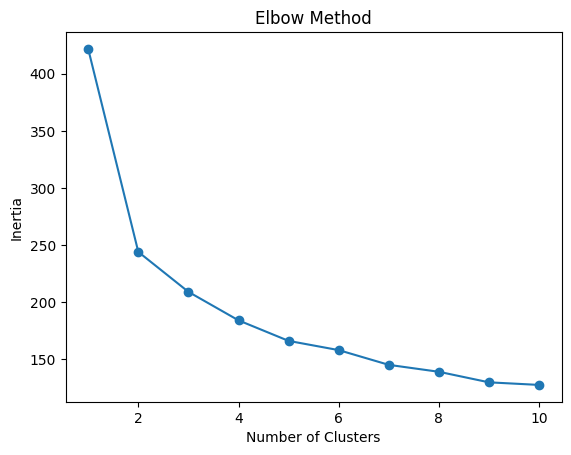

In [119]:
# Elbow method to determine the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


## Apply Clustering Algorithm (K-Means)

In [120]:
# Apply KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')  # Change the number of clusters based on the elbow method
general_df['cluster'] = kmeans.fit_predict(df_scaled)

# Display the first results with cluster labels
general_df.head()

,goals,top_speed(km/h),matches_appareance,minutes_played,distance_covered(km),assists,dribbles,attempts_on_target,total_attempts,passing_accuracy(%),crossing_accuracy(%),tackles_won,balls_recovered,cluster
id_player,,,,,,,,,,,,,,
250139445,5.0,32.95,5.0,417.0,55.54,1.0,25.0,9.0,14.0,87.0,25.00,0.0,11.0,0
250112880,5.0,33.74,5.0,404.0,49.38,3.0,9.0,5.0,21.0,73.0,28.58,1.0,5.0,0
250123677,3.0,33.97,5.0,450.0,58.39,2.0,8.0,4.0,10.0,88.4,30.00,6.0,26.0,0
250005335,2.0,27.85,5.0,286.0,36.73,0.0,0.0,4.0,10.0,94.0,30.77,2.0,8.0,0
250080553,4.0,32.12,5.0,310.0,35.59,2.0,2.0,8.0,11.0,86.0,0.00,0.0,4.0,0


## Visualize the clusters

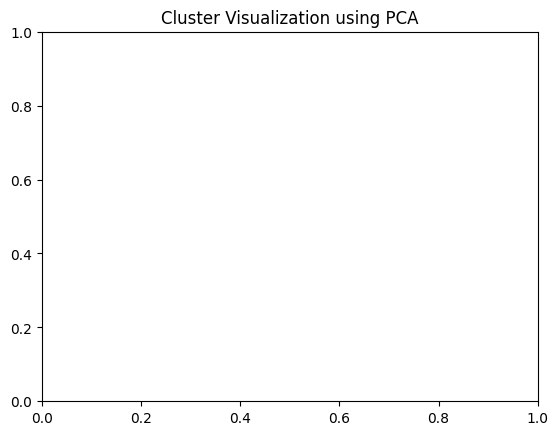

In [121]:
# Reduce dimensionality with PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Create a DataFrame with PCA results
df_pca = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
df_pca['cluster'] = general_df['cluster'].copy()

# Plot the clusters
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=df_pca, palette='viridis')
plt.title('Cluster Visualization using PCA')
plt.show()


In [122]:
path_to_save = os.path.join('..','extraction','data','processed','clusters.csv')
general_df['cluster'].to_csv(path_to_save)

In [123]:
# Analyze each cluster
df_clustered = general_df.groupby('cluster').mean()

# Display the average characteristics of each cluster
df_clustered


,goals,top_speed(km/h),matches_appareance,minutes_played,distance_covered(km),assists,dribbles,attempts_on_target,total_attempts,passing_accuracy(%),crossing_accuracy(%),tackles_won,balls_recovered
cluster,,,,,,,,,,,,,
0,0.707031,32.778633,4.839844,384.863281,46.372969,0.550781,6.105469,2.171875,5.753906,84.938945,19.081523,2.339844,17.511719
1,0.086580,30.080606,1.826840,68.225108,8.159264,0.025974,0.813853,0.259740,0.705628,78.536017,5.032338,0.441558,2.385281
2,0.266160,31.164068,3.992395,223.403042,24.361521,0.216730,2.988593,0.920152,2.627376,81.112548,16.007757,1.193916,6.665399


In [124]:
# Merge 'player_name' column 
general_df = general_df.merge(players_df[['id_player', 'player_name']], on='id_player', how='inner')
general_df.sample(5)

,id_player,goals,top_speed(km/h),matches_appareance,minutes_played,distance_covered(km),assists,dribbles,attempts_on_target,total_attempts,passing_accuracy(%),crossing_accuracy(%),tackles_won,balls_recovered,cluster,player_name
400,250135101,0.0,29.03,4.0,310.0,39.39,1.0,2.0,1.0,3.0,89.00,0.00,3.0,21.0,0,Raphael Onyedika
79,250145803,1.0,36.28,4.0,360.0,44.28,3.0,13.0,3.0,5.0,91.75,25.00,2.0,22.0,0,Matheus Nunes
466,250066886,0.0,33.69,4.0,315.0,36.54,1.0,29.0,5.0,21.0,66.50,5.89,0.0,9.0,0,Ousmane Dembélé
533,250099459,0.0,31.40,3.0,97.0,13.55,0.0,1.0,0.0,0.0,56.00,0.00,0.0,2.0,1,Martin Terrier
396,250138982,0.0,30.36,4.0,32.0,7.14,0.0,0.0,1.0,2.0,16.75,0.00,1.0,0.0,1,Romeo Vermant


In [125]:
general_df[general_df["cluster"]==0]['player_name']

0               Florian Wirtz
1                    Raphinha
2               Malik Tillman
3              İlkay Gündoğan
4             Serhou Guirassy
                ...          
458          Otar Kiteishvili
461    Trent Alexander-Arnold
466           Ousmane Dembélé
472         Davide Zappacosta
478               Josip Mišić
Name: player_name, Length: 256, dtype: object

In [126]:
general_df[general_df["cluster"]==1]['player_name']

11             Karim Adeyemi
30            Jerdy Schouten
31         Pierre Lees-Melou
39                   Endrick
66          Nemanja Radonjić
               ...          
745           Ricardo Esgaio
746              Kyle Walker
747    Marc-André ter Stegen
748           Lukáš Pauschek
749             Sven Ulreich
Name: player_name, Length: 231, dtype: object

In [127]:
general_df[general_df["cluster"]==2]['player_name']

9          Sandro Kulenović
26     Mathias Pereira Lage
27                   Juanpe
28           Kastriot Imeri
29          Marcos Llorente
               ...         
566        Thibaut Courtois
570          Lukas Hradecky
571             Oriol Romeu
603           Pablo Barrios
644         Clément Lenglet
Name: player_name, Length: 263, dtype: object

## Results Interpretation

#### Cluster 0

This cluster seems to represent players with a supporting role or lower offensive profile. They have low goals, assists, 
and dribbles, indicating limited offensive contributions. These players participate in fewer games and cover less distance 
on the field. However, they have a good passing accuracy (84.7%), suggesting they are skilled in distributing the ball, 
though with limited success in shooting and crossing.

#### Cluster 1

This group likely consists of players with minimal involvement in the game. Their statistics are very low in terms of goals, assists, dribbles, and other offensive actions. These players appear to play fewer matches and cover less distance on the field. Their overall contribution is limited, and while their passing accuracy is moderate, they don't engage much offensively or defensively.

#### Cluster 2

This group likely represents dynamic and offensive players. They are faster, with a higher number of goals, dribbles, and attempts on goal. These players are heavily involved in the attack, with many shots and on-target attempts. They cover more distance on the field, indicating an energetic playing style. They also have a good crossing accuracy and moderate participation in assists. This cluster represents key offensive players.

## General Summary:
#### Cluster 0: Players with a supporting role and good passing abilities, but limited offensive contributions.
#### Cluster 1: Players with minimal involvement in the game, contributing very little offensively or defensively.
#### Cluster 2: Key offensive players who are fast, contribute significantly in terms of goals and dribbles, and cover more distance on the field.